# Create fake user data

This notebook generates fake user data with long-tail distributions.

In [219]:
!pip install faker
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [220]:
DATA_DIR="../../data/recommendations"
ratings_path = 'ml-latest-small/ratings.csv'
users_path = 'users.csv'
ratings_df = pd.read_csv(os.path.join(DATA_DIR, ratings_path))

In [221]:
users_df = ratings_df[['userId']].drop_duplicates().reset_index(drop=True)
users_df.head()

,userId
0,1
1,2
2,3
3,4
4,5


In [222]:
# Generate a long-tail probability distribution
def make_probability_distribution(size):
    probability_distribution = np.random.exponential(scale=1, size=size)
    probability_distribution.sort()
    probability_distribution = probability_distribution / probability_distribution.sum()
    return probability_distribution

sum 1.0000000000000002
mean 0.0016393442622950824
max 0.011992775747028157
min 6.929720835674074e-06


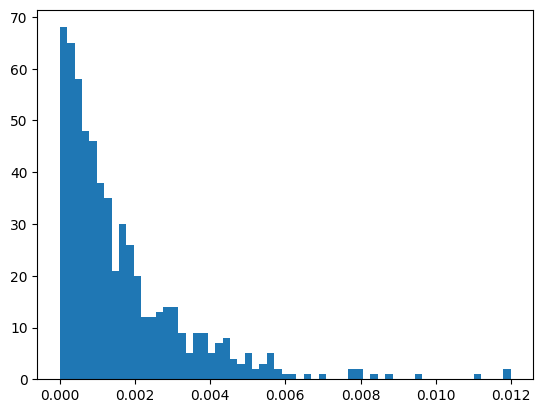

In [223]:
probability_distribution = make_probability_distribution(users_df.size)
print("sum", probability_distribution.sum())
print("mean", probability_distribution.mean())
print("max", probability_distribution.max())
print("min", probability_distribution.min())
# Plot the data to visualize the skew
plt.hist(probability_distribution, bins=int(users_df.size/10))
plt.show()

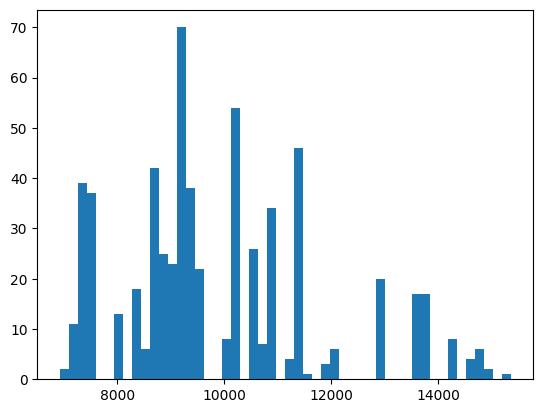

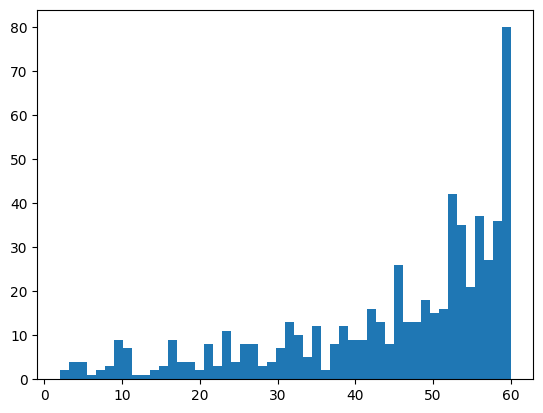

,userId,city,post_code,job,downloads,contract_months
304,305,North Heatherton,49442,Animal technologist,6924,57
31,32,New Austin,76016,Building services engineer,6945,49
455,456,West Laurenhaven,80730,Cabin crew,7183,45
478,479,Meganfurt,47891,Chemical engineer,7204,43
140,141,West Lindamouth,51299,Comptroller,7225,53
...,...,...,...,...,...,...
431,432,Jaymouth,51488,Training and development officer,14793,40
94,95,Port Ryanside,46511,Translator,14793,59
466,467,Collinshaven,62939,Translator,15014,35
218,219,Kimberlyberg,76927,Tree surgeon,15014,56


In [224]:
from faker import Faker

fake = Faker()
NUM_USERS = users_df['userId'].count()

cities = np.array([fake.city() for _ in range(0, int(users_df.size / 5))])
post_codes = {city: [fake.unique.postcode() for _ in range(0, 11)] for city in cities}
jobs = [fake.job() for _ in range(0, int(users_df.size / 5))]

cities_dist = make_probability_distribution(len(cities))
jobs_dist = make_probability_distribution(len(jobs))
contract_dist = make_probability_distribution(61)

users_df['city'] = np.random.choice(cities, size=NUM_USERS, p=cities_dist)
#post codes should be a common pool for each city
users_df['post_code'] = [np.random.choice(post_codes[city]) for city in users_df['city']]
users_df['job'] = np.random.choice(jobs, size=NUM_USERS, p=jobs_dist)
#downloads is loosly associated with the job to get some correlations in the data
users_df['downloads'] = users_df['job'].apply(lambda x: int(np.random.choice(jobs_dist[ord(x[0])-10:ord(x[0])+10]) * 1234567 + ord(x[1]) * 3))
users_df['contract_months'] = np.random.choice(range(0, 61), size=NUM_USERS, p=contract_dist)

plt.hist(users_df['downloads'], bins=50)
plt.show()
plt.hist(users_df['contract_months'], bins=50)
plt.show()

users_df.sort_values(by=['downloads', 'job'])

In [225]:
users_df.describe()

,userId,downloads,contract_months
count,610.000000,610.000000,610.000000
mean,305.500000,9895.795082,44.514754
std,176.236111,1883.164774,14.873101
min,1.000000,6924.000000,2.000000
25%,153.250000,8718.750000,35.000000
50%,305.500000,9389.500000,50.000000
75%,457.750000,10861.000000,56.000000
max,610.000000,15364.000000,60.000000


In [227]:
users_df.to_csv(os.path.join(DATA_DIR, users_path), index=False)